# Data Pipeline

face images were web-scraped from [Polk County](https://apps.polkcountyiowa.gov/PolkCountyInmates/CurrentInmates/)


In [1]:
import pandas as pd
import os
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. DATA PREPARATION AND EXPLORATION

## original data before clean

In [2]:
data = pd.read_csv('C:\\Desktop\\AGE\\face2bmi\\data\\full.csv')
data.head()

nameid                     name              book_date            city  \
0    7482      JAMES DEYO ROBINSON  3/10/2017 10:05:55 AM      WAUKEE, IA   
1  754952  CORDERRO ALTON LAURENCE   4/23/2017 8:57:43 AM  DES MOINES, IA   
2  644421      TAYLOR LOUIS HARLAN   12/7/2017 4:00:07 PM  DES MOINES, IA   
3  699804   MALIK TYRONE MANDUJANO    4/1/2018 3:24:44 AM  DES MOINES, IA   
4  238047        DUSTIN GLEN BLACK    8/5/2018 9:26:54 PM  DES MOINES, IA   

         holding_location  age  height  weight   race   sex   eyes    hair  \
0                     PCJ   54  5' 11"     280  Black  Male  Brown   Black   
1  Cherokee Mental Health   26  5' 11"     210  Black  Male  Brown   Black   
2                     PCJ   24  5' 09"     290  White  Male  Green  Blonde   
3                     PCJ   21  5' 03"     130  Black  Male  Brown   Black   
4                     PCJ   29  6' 02"     230  White  Male   Blue  Blonde   

   bookid  
0  248038  
1  250464  
2  263711  
3  270020  
4  277774

In [3]:
#DATA EXPLORATION
# regex to extract feet and inches from height
regex_feet = re.compile("([0-9]+)\'")
regex_inches = re.compile("([0-9]+)\"")

def extract_numbers(x, regex):
    captures = regex.findall(x)
    if len(captures) > 0:
        try:
            return int(captures[0])
        except:
            return None
    else:
        return None
    
# parse the height string to feet and inches
data['feet'] = data['height'].map(lambda i: extract_numbers(i, regex_feet))
data['inches'] = data['height'].map(lambda i: extract_numbers(i, regex_inches))
data.loc[data.inches > 12,:]

nameid                   name              book_date            city  \
31    1083884    CALEB CHARLES RUTAN    1/2/2019 6:27:40 AM  DES MOINES, IA   
456    912542   HUSSEIN NKUSU TAMBWE   7/4/2019 10:40:46 AM   URBANDALE, IA   
566   1169382    JULIANNE JO BECKETT   7/15/2019 4:50:55 PM   KNOXVILLE, IA   
622   1227456      ANDREW LANTA BOYD   7/19/2019 8:11:17 AM  DES MOINES, IA   
640    877215     SIOUX HAWK HOFFNER   7/22/2019 6:51:56 PM  DES MOINES, IA   
671   1051124   JASON ALLAN BROWNING   7/24/2019 6:10:24 PM   URBANDALE, IA   
1068  1012250  DARRYL ANTHONY HISHAW   10/6/2019 4:48:50 PM  DES MOINES, IA   
1192  1170588               KAY  SAW  10/27/2019 4:21:49 PM  DES MOINES, IA   

     holding_location  age  height  weight              race     sex   eyes  \
31                PCJ   48  6' 63"     200             White    Male  Brown   
456               PCJ   24  5' 57"     175             Black    Male  Brown   
566               PCJ   20  5' 59"     350             White  Female  Hazel   
622               PCJ   35  5' 59"       0             Black    Male  Brown   
640               PCJ   24  4' 49"      90  Pacific Islander  Female  Brown   
671               PCJ   41  6' 60"     205             White    Male  Green   
1068              PCJ   26  5' 56"     145             Black    Male  Brown   
1192              PCJ   22  5' 54"     120             Asian    Male  Brown   

       hair  bookid  feet  inches  
31     Gray  287593   6.0    63.0  
456   Black  296374   5.0    57.0  
566   Brown  296977   5.0    59.0  
622   Black  297206   5.0    59.0  
640   Brown  297380   4.0    49.0  
671   Brown  297503   6.0    60.0  
1068  Black  301966   5.0    56.0  
1192  Black  303124   5.0    54.0

In [4]:
# found some incorrect inches, assume 63" to 6.3"
data['inches'] = data['inches'].map(lambda i: i / 10 if i > 12 else i)
# convert feet/inches to inches
data['height'] = data.apply(lambda row: row['feet'] * 12 + row['inches'], axis=1)
# covert inches to m
data['height'] = data['height'].map(lambda i: i * 2.54 / 100)
# weight pounds => kg
data['weight'] = data['weight'].map(lambda i: i * 0.453592)
# create gender (number format of sex)
data['gender'] = data['sex'].map(lambda i: 1 if i == 'Male' else 0)

data[['nameid','age','height','weight','race','sex','eyes','hair']].head()

nameid  age  height     weight   race   sex   eyes    hair
0    7482   54  1.8034  127.00576  Black  Male  Brown   Black
1  754952   26  1.8034   95.25432  Black  Male  Brown   Black
2  644421   24  1.7526  131.54168  White  Male  Green  Blonde
3  699804   21  1.6002   58.96696  Black  Male  Brown   Black
4  238047   29  1.8796  104.32616  White  Male   Blue  Blonde

## Descriptive Analysis

In [7]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 12

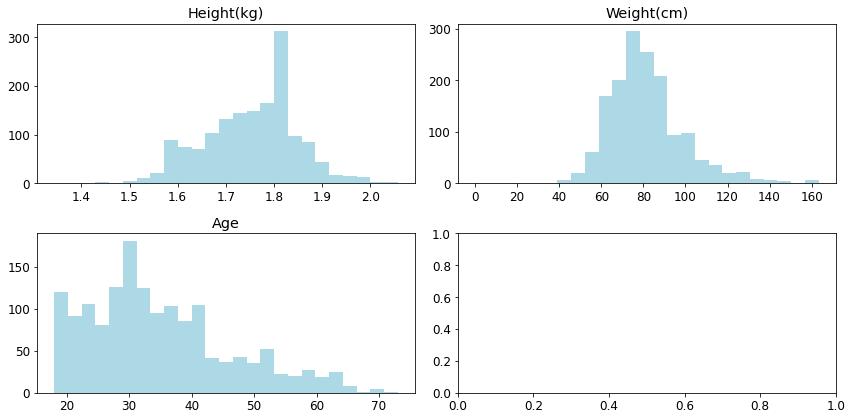

In [6]:
def ax_subplot(ax, x, title, bins = 25, color = 'lightblue'):
    x = x[~x.isnull()]
    ax.hist(x, bins = bins, color = color)
    ax.set_title(title)
    
fig, ax = plt.subplots(2,2)
ax_subplot(ax[0,0], data.height, 'Height(kg)')
ax_subplot(ax[0,1], data.weight, 'Weight(cm)')
ax_subplot(ax[1,0], data.age, 'Age')
plt.tight_layout()
plt.show()

### Gender and Race Imbalance

<AxesSubplot:xlabel='count', ylabel='race'>

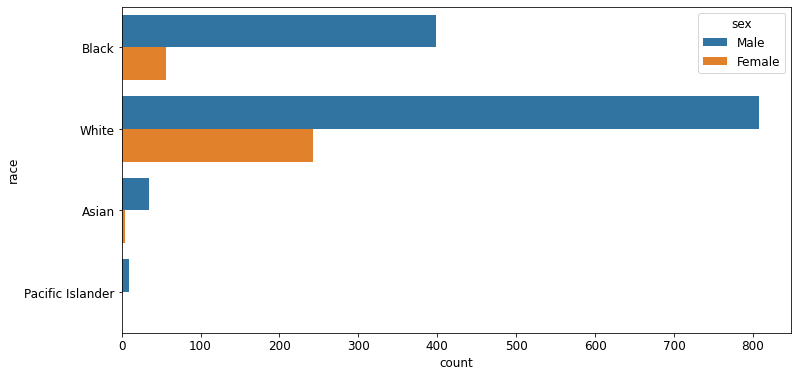

In [8]:
sns.countplot(y = 'race' ,data = data, hue = 'sex')

## split train / valid data

In [43]:
# remove rows that no face images
data['index'] = data['bookid'].map(lambda i: str(i) +'.jpg')
allimage = os.listdir('./data/face/')
data = data.loc[data['index'].isin(allimage),:]

# split train/valid
in_train = np.random.random(size = len(data)) <= 0.8
train = data.loc[in_train,:]
test = data.loc[~in_train,:]

print('train data dimension: {}'.format(str(train.shape)))
print('test data dimension:  {}'.format(str(test.shape)))

# output to csv files
train.to_csv('./data/train.csv', index = False)
test.to_csv('./data/valid.csv', index = False)

train data dimension: (1262, 17)
test data dimension:  (282, 17)


# 2. ALLIGN FACES USING MTCNN

In [44]:
from mtcnn.mtcnn import MTCNN
import cv2
import os

test_dir = './data/test/single_face/'
train_dir = './data/face/'
test_processed_dir = './data/test/test_aligned/'
train_processed_dir = './data/face_aligned/'

os.listdir(test_dir)

['albert-einstein.jpg',
 'barack-obama.jpg',
 'bill-gates.jpg',
 'emma_watson.jpg',
 'hilary_clinton.jpg',
 'kent_zheng.jpg',
 'Kim Jong-un.jpg',
 'leonardo.jpeg',
 'trump.jpg',
 'xi.jpg']

In [45]:
img = cv2.cvtColor(cv2.imread(test_dir + 'trump.jpg'), cv2.COLOR_BGR2RGB)
detector = MTCNN()
print(detector.detect_faces(img))
box = detector.detect_faces(img)[0]

[{'box': [355, 75, 266, 347], 'confidence': 0.9983004927635193, 'keypoints': {'left_eye': (432, 209), 'right_eye': (551, 208), 'nose': (492, 276), 'mouth_left': (445, 346), 'mouth_right': (544, 347)}}]


In [46]:
from keras.preprocessing import image
from keras_vggface import utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def crop_img(im,x,y,w,h):
    return im[y:(y+h),x:(x+w),:]

def detect_face(face_path):
    img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    box = detector.detect_faces(img)[0]
    return box

def detect_faces(face_path):
    img = image.load_img(face_path)
    img = image.img_to_array(img)
    box = detector.detect_faces(img)
    return box

def draw_box(face_path = './test/trump.jpg', plot = True):
    
    boxes = detect_faces(face_path)
    im = np.array(Image.open(face_path), dtype=np.uint8)
    
    if plot:
        # Create figure and axes
        num_box = len(boxes)
        fig,ax = plt.subplots(1, (1 + num_box))
        fig.set_size_inches(4 * (1 + num_box),4)
        # Display the image
        ax[0].imshow(im)
        ax[0].axis('off')
        # Create a Rectangle patch
        for idx, box in enumerate(boxes):
            box_x, box_y, box_w, box_h = box['box']
            rect = patches.Rectangle((box_x, box_y), box_w, box_h, linewidth=1,edgecolor='r',facecolor='none')
            ax[0].add_patch(rect)
            ax[0].text(box_x, box_y, '{:3.2f}'.format(box['confidence']))
            for i in box['keypoints'].keys():
                circle = patches.Circle(box['keypoints'][i], radius = 5, color = 'red')
                ax[0].add_patch(circle)
            ax[1 + idx].imshow(crop_img(im, *box['box']))
            ax[1 + idx].axis('off')
        plt.show()
    
    res = [crop_img(im, *box['box']) for box in boxes]
    
    return res

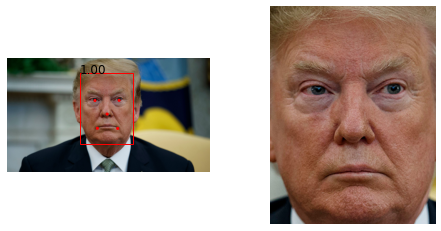

In [47]:
res = draw_box(test_dir + 'trump.jpg')  # Drawing Bounding Box on Faces

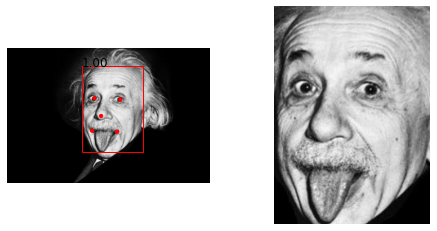

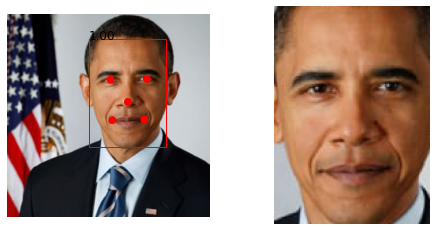

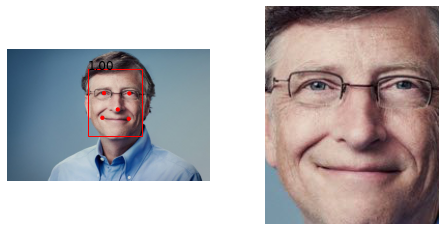

In [48]:
for img in os.listdir(test_dir)[0:3]:  #Drawing Bounding Box on all three faces in directory
    draw_box(test_dir + img)

## Process Cropping For All test Faces

In [49]:
from tqdm import tqdm
import shutil
if os.path.exists(test_processed_dir):
    shutil.rmtree(test_processed_dir)
os.mkdir(test_processed_dir)
for img in tqdm(os.listdir(test_dir)):
    box = detect_face(test_dir+img)
    im = plt.imread(test_dir+img)
    cropped = crop_img(im, *box['box'])
    plt.imsave(test_processed_dir+img, crop_img(im, *box['box']))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.09it/s]


## Process Cropping For All train Faces

In [50]:
def cut_negative_boundary(box):
    res = []
    for x in box['box']:
        if x < 0:
            x = 0
        res.append(x)
    box['box'] = res
    return box

In [51]:
if os.path.exists(train_processed_dir):
    shutil.rmtree(train_processed_dir)
os.mkdir(train_processed_dir)

for img in tqdm(os.listdir(train_dir)):
    try:
        box = detect_face(train_dir+img)
        box = cut_negative_boundary(box)
        im = plt.imread(train_dir+img)
        cropped = crop_img(im, *box['box'])
        plt.imsave(train_processed_dir+img, cropped)
    except:
        print(img)
        continue

100%|██████████████████████████████████████████████████████████████████████████████| 1544/1544 [13:00<00:00,  1.98it/s]

304916.jpg


## TRANSFER LEARNING

In [52]:
# Defining Transfer Learning Model
mode = 'train' #'train' or 'predict'
model_type = 'vgg16'
model_tag = 'base'
model_id = '{:s}_{:s}'.format(model_type, model_tag)
model_dir = './saved_model/model_{:s}.h5'.format(model_id)
bs = 8
epochs = 2
freeze_backbone = True # True => transfer learning; False => train from scratch

In [53]:
import pandas as pd
import os
import json
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import glob

allimages = os.listdir('./data/face_aligned/')
train = pd.read_csv('./data/train.csv')
valid = pd.read_csv('./data/valid.csv')

train = train.loc[train['index'].isin(allimages)]
valid = valid.loc[valid['index'].isin(allimages)]

In [54]:
# create metrics, model dirs
Path('./metrics').mkdir(parents = True, exist_ok = True)
Path('./saved_model').mkdir(parents = True, exist_ok = True)

## Data Exploration to Display Age, Race AND Gender

This is fairly small dataset, which comprises 1530 records and  16 columns.

* sex imbalance: 80% of the data is male
* age is near truncated normal distribution. min Age is 18, average Age is 34.
* race is dominated by Black and White. Asian samples are very limited.

In [55]:
# Exploring our data to display age, race and Gender
data = pd.concat([train, valid])
data[['age','race','sex', 'index']].head()

age   race   sex       index
0   54  Black  Male  248038.jpg
1   26  Black  Male  250464.jpg
2   24  White  Male  263711.jpg
3   29  White  Male  277774.jpg
4   18  White  Male  279426.jpg

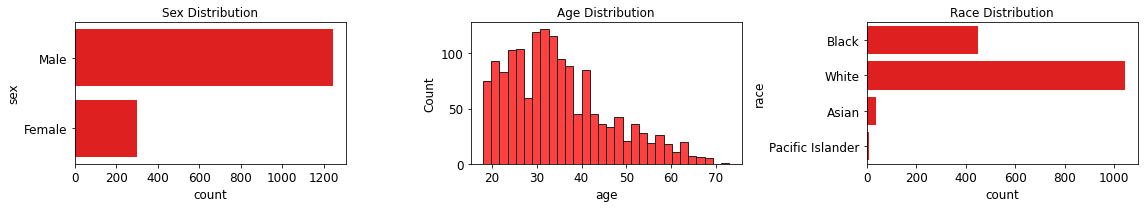

In [56]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches((16, 3))
sns.countplot(y = data.sex, color = 'red', ax = axs[0])
axs[0].set_title('Sex Distribution')
sns.histplot(data.age,  bins = 30, kde=False, color='red', ax = axs[1])
axs[1].set_title('Age Distribution')
sns.countplot(y = data.race, color = 'red', ax = axs[2])
axs[2].set_title('Race Distribution')
plt.tight_layout()

## Model Training

In [57]:
# keras vggface model
from keras.engine import Model
from keras.layers import Flatten, Dense, Input, Dropout, Activation, BatchNormalization
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.preprocessing import image

# image manipulation
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

# face alignment
from mtcnn.mtcnn import MTCNN

# model metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics.regression import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# common packages
import os
import numpy as np
import pandas as pd

def rmse(x,y):
    return np.sqrt(mean_squared_error(x,y))

def mae(x,y):
    return mean_absolute_error(x,y)

def cor(x,y):
    return pearsonr(x,y)[0]

def auc(label, pred):
    return roc_auc_score(label, pred)
    
def imgs2arr(img_names, img_dir, version = 1):
    """ convert images to mutli-dimensional array
    Args:
        @img_names: image names (e.g. [pic001.png])
        @img_dir: directory of the images (e.g. ./tmp)
        @version: for vggface model preprocessing
    Return:
        np.array
    """
    imgs = []
    for img in img_names:
        imgs += [img2arr(os.path.join(img_dir,img), version)]
    return np.concatenate(imgs)

def process_arr(arr, version):
    """process array (resize, mean-substract)
    Args:
        @arr: np.array
    Return:
        np.array
    """
    img = cv2.resize(arr, (224, 224))
    img = np.expand_dims(img, 0)
    img = utils.preprocess_input(img, version = version)
    return img

def img2arr(img_path, version):
    """convert single image to array
    Args:
        @img_path: full path of the image (e.g. ./tmp/pic001.png)
    Return:
        np.array
    """
    img = image.load_img(img_path)
    img = image.img_to_array(img)
    img = process_arr(img, version)
    return img

def crop_img(im,x,y,w,h):
    return im[y:(y+h),x:(x+w),:]

def input_generator(data, bs, img_dir, is_train = True, version = 1):
    """data input pipeline
    Args:
    @data: dataframe
    @bs: batch size
    @img_dir: dir of saved images
    @is_train: train/valid [sample] or test [sequential]
    """
    sex_map = {'Male':1, 'Female':0}
    loop = True
    
    while loop:
        if is_train:
            sampled = data.sample(bs)
            x = imgs2arr(sampled['index'],img_dir, version)
            y = [sampled['age'].values, sampled['sex'].map(lambda i: sex_map.get(i,0)).values]
            res = (x,y)
        else:
            if len(data) >= bs:
                sampled = data.iloc[:bs,:]
                data = data.iloc[bs:,:]
                res = imgs2arr(sampled['index'],img_dir, version)
            else: 
                loop = False
        yield res 

class FacePrediction(object):
    
    def __init__(self, img_dir, model_type = 'vgg16', sex_thresh = 0.05):
        self.model_type = model_type
        self.img_dir = img_dir
        self.detector = MTCNN()
        self.sex_thresh = sex_thresh
        if model_type in ['vgg16','vgg16_fc6']:
            self.version = 1
        else:
            self.version = 2
    
    def define_model(self, hidden_dim = 128, drop_rate=0.0, freeze_backbone = True):
        
        if self.model_type == 'vgg16_fc6':
            vgg_model = VGGFace(model = 'vgg16', include_top=True, input_shape=(224, 224, 3))
            last_layer = vgg_model.get_layer('fc6').output
            flatten = Activation('relu')(last_layer)
        else:
            vgg_model = VGGFace(model = self.model_type, include_top=False, input_shape=(224, 224, 3))
            last_layer = vgg_model.output
            flatten = Flatten()(last_layer)
        
        if freeze_backbone:
            for layer in vgg_model.layers:
                layer.trainable = False
                
        def block(flatten, name):
            x = Dense(hidden_dim, name=name + '_fc1')(flatten)
            x = BatchNormalization(name = name + '_bn1')(x)
            x = Activation('relu', name = name+'_act1')(x)
            x = Dropout(drop_rate)(x)
            x = Dense(hidden_dim, name=name + '_fc2')(x)
            x = BatchNormalization(name = name + '_bn2')(x)
            x = Activation('relu', name = name+'_act2')(x)
            x = Dropout(drop_rate)(x)
            return x
        
        
        x = block(flatten, name = 'age')
        out_age = Dense(1, activation='linear', name='age')(x)
        
        x = block(flatten, name = 'sex')
        out_sex = Dense(1, activation = 'sigmoid', name = 'sex')(x)

        custom_vgg_model = Model(vgg_model.input, [out_age, out_sex])
        custom_vgg_model.compile('adam', 
                                 {'age':'mae','sex':'binary_crossentropy'},
                                 {'sex': 'accuracy'}, 
                                 loss_weights={'age':0.1, 'sex':0.1})

        self.model = custom_vgg_model
        

    def train(self, train_data, valid_data, bs, epochs, callbacks):
        train_gen = input_generator(train_data, bs, self.img_dir, True, self.version)
        valid_gen = input_generator(valid_data, bs, self.img_dir, True, self.version)
        self.model.fit_generator(train_gen, len(train_data) // bs, epochs, 
                                 validation_data = valid_gen, 
                                 validation_steps = len(valid_data) //  bs, 
                                 callbacks=callbacks)
        
    def evaulate(self, valid_data):  #model evaluation
        imgs = valid_data['index'].values
        arr = imgs2arr(imgs, self.img_dir, self.version)
        age, sex = self.model.predict(arr)
        metrics = {'age_mae':mae(age[:,0], valid_data.age.values), 
                   'sex_auc':auc(valid_data.gender, sex[:,0])}
        return metrics
        
    def save_weights(self, model_dir):
        self.model.save_weights(model_dir)
        
    def load_weights(self, model_dir):
        self.model.load_weights(model_dir)
    
    def detect_faces(self, face_path, confidence):
        img = image.load_img(face_path)
        img = image.img_to_array(img)
        box = self.detector.detect_faces(img)
        box = [i for i in box if i['confidence'] > confidence]
        res = [crop_img(img, *i['box']) for i in box]
        res = [process_arr(i, self.version) for i in res]
        return box, res
    
    def predict(self, img_dir, show_img = False):
        if os.path.isdir(img_dir):
            imgs = os.listdir(img_dir)
            arr = imgs2arr(imgs, img_dir, self.version)
        else:
            arr = img2arr(img_dir, self.version)
        preds = self.model.predict(arr)
        
        if show_img and os.path.isdir(img_dir):
            age, sex = preds #bmi, 
            num_plots = len(imgs)
            ncols = 5
            nrows = int((num_plots - 0.1) // ncols + 1)
            fig, axs = plt.subplots(nrows, ncols)
            fig.set_size_inches(3 * ncols, 3 * nrows)
            for i, img in enumerate(imgs):
                col = i % ncols
                row = i // ncols
                axs[row, col].imshow(plt.imread(os.path.join(img_dir,img)))
                axs[row, col].axis('off')
                axs[row, col].set_title( 'AGE: {:02.0f} SEX: {:2.1f}'.format(age[i,0], sex[i,0]), fontsize = 10)
        
        return preds
    
    def predict_df(self, img_dir):
        assert os.path.isdir(img_dir), 'input must be directory'
        fnames = os.listdir(img_dir)
        age, sex = self.predict(img_dir) 
        res = pd.DataFrame({'img':fnames,'age':age[:,0], 'sex':sex[:,0]}) 
        res['sex_prob'] = res['sex']
        res['sex'] = res['sex'].map(lambda i: 'Male' if i > self.sex_thresh else 'Female')
        
        return res
    
    def predict_faces(self, img_path, show_img = True, color = "white", fontsize = 12, 
                      confidence = 0.95, fig_size = (16,12)):
        
        assert os.path.isfile(img_path), 'only single image is supported'
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        boxes, faces = self.detect_faces(img_path, confidence)
        preds = [self.model.predict(face) for face in faces]
        
        if show_img:
            # Create figure and axes
            num_box = len(boxes)
            fig,ax = plt.subplots()
            fig.set_size_inches(fig_size)
            # Display the image
            ax.imshow(img)
            ax.axis('off')
            # Create a Rectangle patch
            for idx, box in enumerate(boxes):
                age, sex = preds[idx]
                box_x, box_y, box_w, box_h = box['box']
                rect = patches.Rectangle((box_x, box_y), box_w, box_h, linewidth=1,edgecolor='r',facecolor='none')
                ax.add_patch(rect)
                ax.text(box_x, box_y, 
                        'AGE:{:02.0f}\nSEX:{:s}'.format( age[0,0], 'M' if sex[0,0] > self.sex_thresh else 'F'),
                       color = color, fontsize = fontsize)
            plt.show()
        
        return preds

C:\Users\oluwa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [58]:
#DEFINING OUR CALLBACKS (SAVING OUR MODEL, PATIENCE E.T.C)
es = EarlyStopping(patience=3)
ckp = ModelCheckpoint(model_dir, save_best_only=True, save_weights_only=True, verbose=1)
tb = TensorBoard('./tb/%s'%(model_id))
callbacks = [es, ckp]

model = FacePrediction(img_dir = './data/face_aligned/', model_type = model_type)
model.define_model(freeze_backbone = freeze_backbone)
model.model.summary()
if mode == 'train':
    model_history = model.train(train, valid, bs = bs, epochs = 5, callbacks = callbacks)
else:
    model.load_weights(model_dir)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 224, 224, 64) 1792        input_7[0][0]                    
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 224, 224, 64) 36928       conv1_1[0][0]                    
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 112, 112, 64) 0           conv1_2[0][0]                    
____________________________________________________________________________________________

C:\Users\oluwa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


157/157 [==============================] - 114s 707ms/step - loss: 3.1686 - age_loss: 31.4528 - sex_loss: 0.2336 - sex_accuracy: 0.9118 - val_loss: 2.1603 - val_age_loss: 21.5208 - val_sex_loss: 0.0824 - val_sex_accuracy: 0.9643

Epoch 00001: val_loss improved from inf to 2.16033, saving model to ./saved_model\model_vgg16_base.h5
Epoch 2/5
157/157 [==============================] - 108s 691ms/step - loss: 1.7636 - age_loss: 17.5707 - sex_loss: 0.0655 - sex_accuracy: 0.9831 - val_loss: 0.7072 - val_age_loss: 7.0365 - val_sex_loss: 0.0354 - val_sex_accuracy: 0.9964

Epoch 00002: val_loss improved from 2.16033 to 0.70718, saving model to ./saved_model\model_vgg16_base.h5
Epoch 3/5
157/157 [==============================] - 109s 695ms/step - loss: 0.6625 - age_loss: 6.5637 - sex_loss: 0.0608 - sex_accuracy: 0.9782 - val_loss: 0.5051 - val_age_loss: 5.0341 - val_sex_loss: 0.0173 - val_sex_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.70718 to 0.50513, saving model to ./saved_model

## Evaluation From Research

![](./img/tensorboard_results.png)

| Model | Age (RMSE) | Sex (AUC) |
|-------|------------|------------|
|vgg16  |5.66|0.99|
|vgg16_fc6|6.04 | 0.99 |
|resnet50|7.02 | 0.99|

## MODEL EVALUATION

In [59]:
valid['gender'] = valid.sex.map(lambda i: 1 if i == 'Male' else 0)

In [60]:
metrics = model.evaulate(valid)
metrics['model'] = model_type
with open('./metrics/{:s}.json'.format(model_type), 'w') as f:
    json.dump(metrics, f)

metrics = []
for i in glob.glob('./metrics/*.json'):
    with open(i, 'r') as f:
        res = json.load(f)
    metrics.append(res)
metrics = pd.DataFrame(metrics)
metrics['model'] = metrics['model'].apply(lambda i: '* ' + i if i == model_id else i)
metrics.set_index('model').round(3)

age_mae  sex_auc
model                  
vgg16    4.659    0.995

## Predictions

### predict from a single image

In [61]:
model.predict('./data/test/test_aligned/trump.jpg')

[array([[73.91065]], dtype=float32), array([[0.11342549]], dtype=float32)]

### predict from a directory

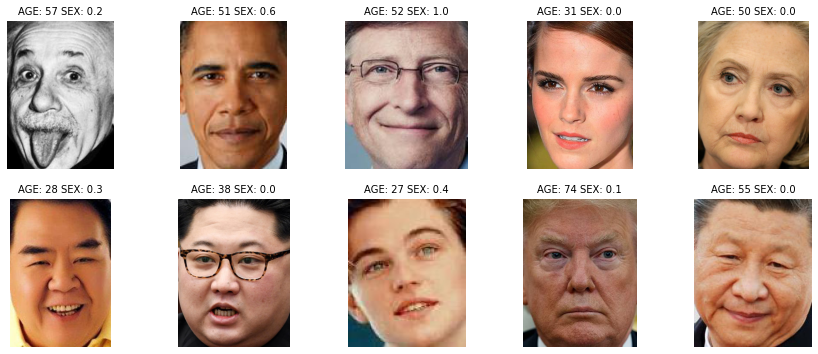

In [62]:
preds = model.predict('./data/test/test_aligned/', show_img = True)

In [63]:
model.predict_df('./data/test/test_aligned')

img        age     sex  sex_prob
0  albert-einstein.jpg  57.410004    Male  0.216216
1     barack-obama.jpg  50.756161    Male  0.642520
2       bill-gates.jpg  51.800877    Male  0.974178
3      emma_watson.jpg  31.256996  Female  0.000119
4   hilary_clinton.jpg  50.446499  Female  0.000010
5       kent_zheng.jpg  28.277340    Male  0.267943
6      Kim Jong-un.jpg  37.577164  Female  0.002502
7        leonardo.jpeg  27.079588    Male  0.379714
8            trump.jpg  73.910629    Male  0.113425
9               xi.jpg  55.112484  Female  0.031740

### predict multiple faces

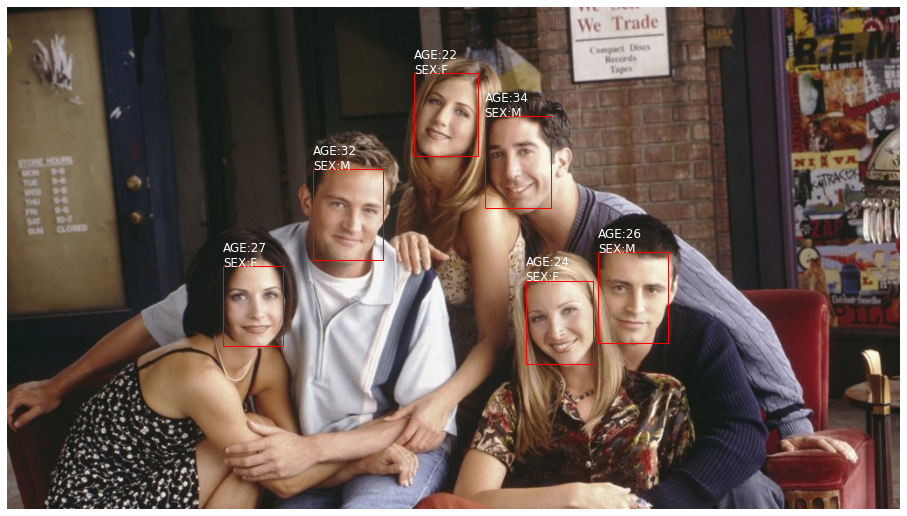

In [59]:
preds = model.predict_faces('./data/test/multi_face/friends.jpg', color = 'white')

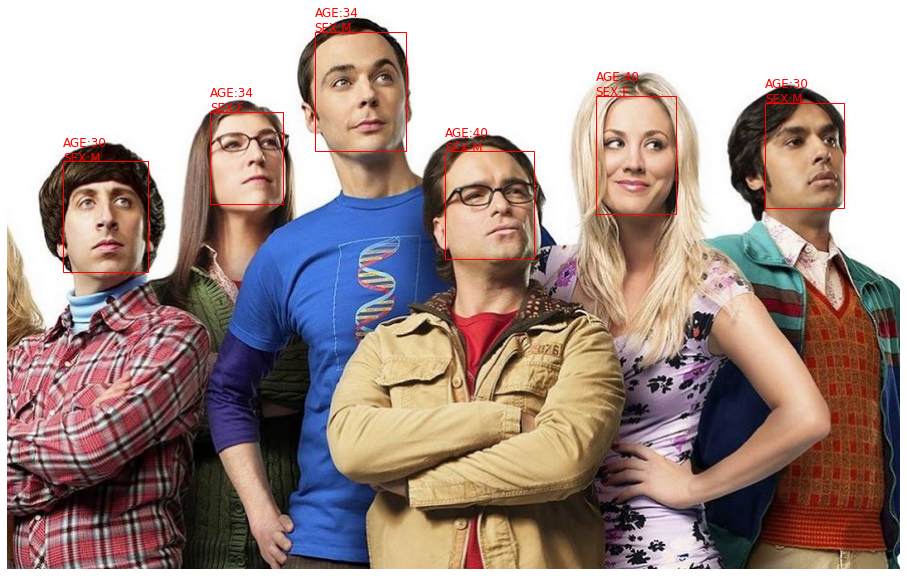

In [61]:
preds = model.predict_faces('./data/test/multi_face/the-big-bang-theory-op-netflix.jpg', color = 'red')

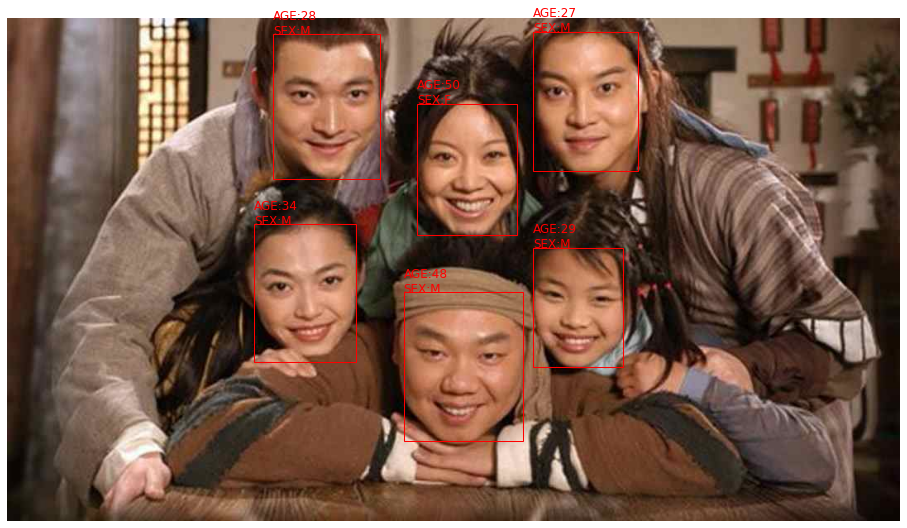

In [62]:
preds = model.predict_faces('./data/test/multi_face/wulinwaizhuan.jpg', color = 'red')

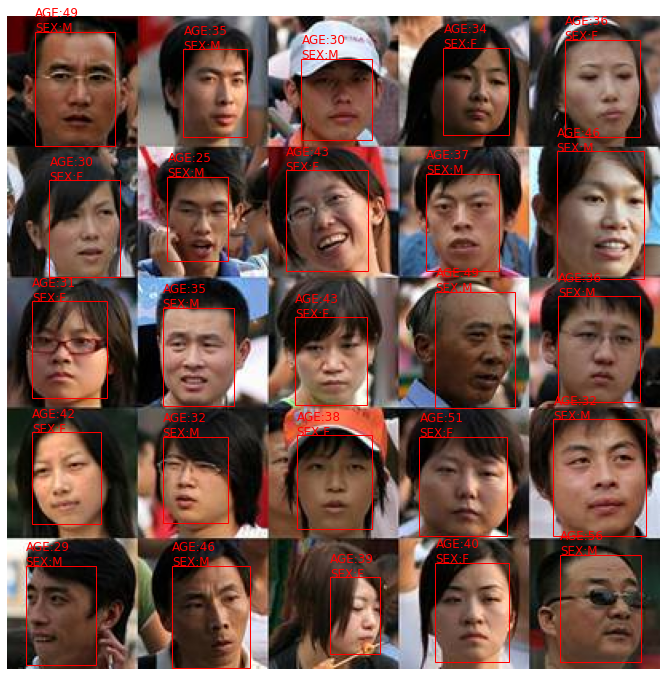

In [105]:
preds = model.predict_faces("C:\\Users\\oluwa\\OneDrive\\Desktop\\AGE\\face2bmi\\data\\test\\multi_face\\image002(1).jpg", color = 'red')

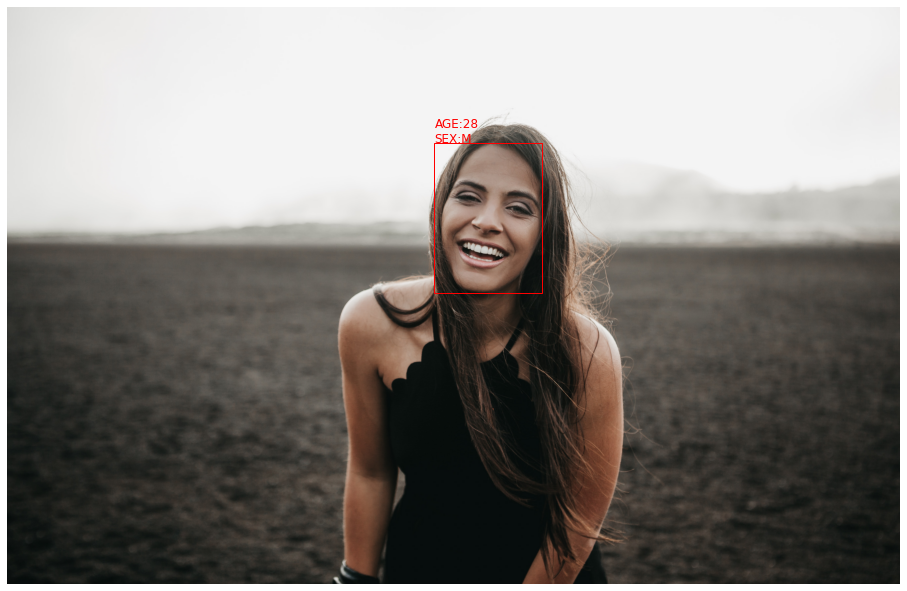

In [63]:
preds = model.predict_faces('C:\\Users\\oluwa\\OneDrive\\Desktop\\AGE\\face2bmi\\data\\test\\multi_face\\candice.jpg', color = 'red')

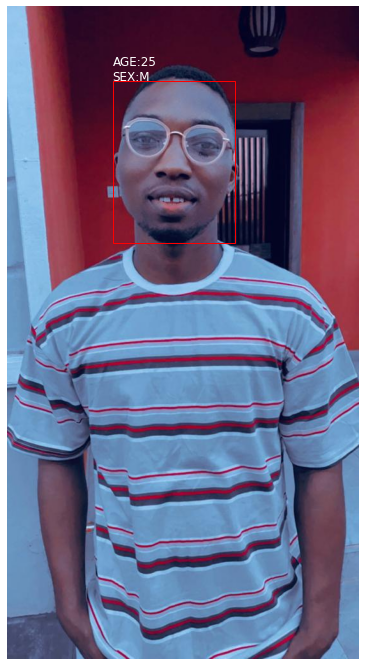

In [65]:
preds = model.predict_faces('C:\\Users\\oluwa\\OneDrive\\Desktop\\AGE\\face2bmi\\data\\test\\multi_face\\tobi.jpg', color = 'white')

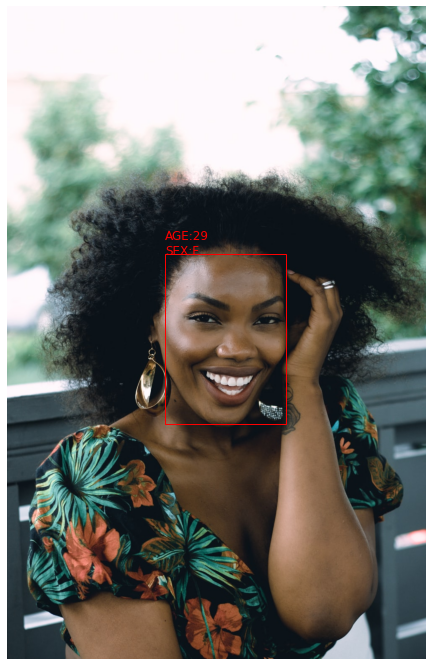

In [80]:
preds = model.predict_faces("C:\\Users\\oluwa\\OneDrive\\Desktop\\AGE\\face2bmi\\data\\test\\multi_face\\Lady.jpeg", color = 'red')